In this section, we use XGboost model for the prediction

# 1. Import Needed libraries

In [37]:
import pandas as pd
import numpy as np
import xgboost as xgb
from xgboost import plot_importance, plot_tree
import matplotlib.pylab as plt
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 13, 7
import warnings
warnings.filterwarnings("ignore")
from sklearn.metrics import mean_absolute_error 

# 2. Read data

In [31]:
data = pd.read_csv('Data_Files/CSV/part-00000-4f161bf8-72b5-4963-84c9-7d9d786286f7-c000.csv', index_col = [0],
                   parse_dates=[0], names = ['Date','Population', 'Consumption', 'Persevelance', 'AveragePrice'])
#Indices are not sorted - order the readings
data.sort_index(inplace=True)
data.head(5)

,Population,Consumption,Persevelance,AveragePrice
Date,,,,
2008-01-01,90910000,21.2,26.4,1.07
2009-01-01,92438000,21.5,27.0,1.12
2010-01-01,93966000,21.5,27.6,1.17
2011-01-01,95595000,21.4,27.0,1.20
2012-01-01,97224000,21.4,26.5,1.23


In [32]:
data['Income'] = data['Population'].astype(float) * data['Consumption'].astype(float) *\
data['Persevelance'].astype(float) * data['AveragePrice'].astype(float)/20*365/10**9

In [33]:
data.head()

,Population,Consumption,Persevelance,AveragePrice,Income
Date,,,,,
2008-01-01,90910000,21.2,26.4,1.07,993.569136
2009-01-01,92438000,21.5,27.0,1.12,1096.815694
2010-01-01,93966000,21.5,27.6,1.17,1190.603110
2011-01-01,95595000,21.4,27.0,1.20,1209.641923
2012-01-01,97224000,21.4,26.5,1.23,1237.659308


# 3. Define Attributes and labets, test and train sets

In [34]:
y = data['Income']

In [35]:
X = data[['Population', 'Consumption', 'Persevelance', 'AveragePrice']]

In [36]:
X_train, X_test = X[:-7], X[-7:]
y_train, y_test = y[:-7], y[-7:]
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((4, 4), (4,), (7, 4), (7,))

# 4. Train the model 

In [38]:
reg = xgb.XGBRegressor(n_estimators=1000)
reg.fit(X_train, y_train)

[13:56:55] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=1, gamma=0,
       importance_type='gain', learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=1000,
       n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=None, subsample=1, verbosity=1)

# 5. Predict values

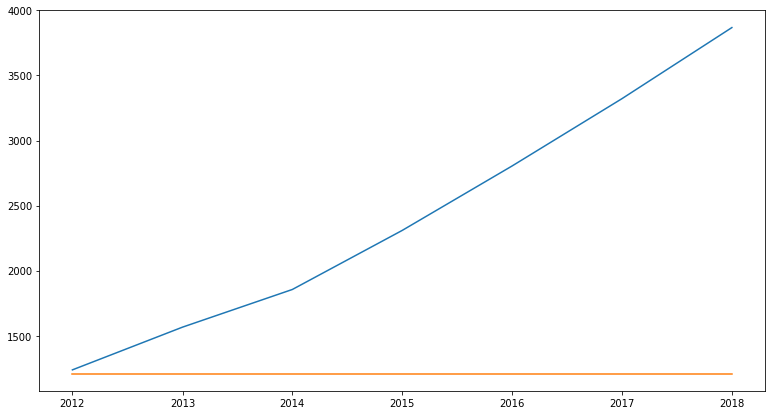

In [39]:
# Testing on test dataset 
y_pred_test = reg.predict(X_test)
plt.plot(X_test.index, y_test)
plt.plot(X_test.index, y_pred_test)

In [40]:
# Define MAPE for test dataset
mean_absolute_error(y_test, y_pred_test)

1213.4873784523827

# Conclusion

It does not have any sense to improve the model, because of a lot of times worst than Neural Network models based on MAE